In [1]:
import json
import urllib.request as ur
from tqdm.notebook import tqdm
import datetime as dt

import numpy as np
import pandas as pd

import lmfit
#import numdifftools
#import corner

_np = np.seterr(all="ignore", divide="raise")

In [4]:
def logistic_gompertz_function(x, a1, b1, k1, a2, b2, k2, e):
    d1 = k1 * (b1 - np.array(x))
    l1 = a1 / (1 + np.exp(d1))
    exp2 = - np.exp(k2 * (b2 - x))
    g2 = (a2 - a1) * np.exp(exp2)
    return l1 + g2 + e

In [29]:
def gompertz_logistic_function(x, a1, b1, k1, a2, b2, k2, e):
    exp1 = - np.exp(k1 * (b1 - x))
    g1 = a1 * np.exp(exp1)
    d2 = k2 * (b2 - np.array(x))
    l2 = (a2 - a1) / (1 + np.exp(d2))
    return g1 + l2 + e

In [12]:
def double_gompertz_function(x, a1, b1, k1, a2, b2, k2, e):
    exp1 = - np.exp(k1 * (b1 - x))
    g1 = a1 * np.exp(exp1)
    exp2 = - np.exp(k2 * (b2 - x))
    g2 = (a2 - a1) * np.exp(exp2)
    return g1 + g2 + e

In [13]:
def double_logistic_function(x, a1, b1, k1, a2, b2, k2, e):
    d1 = k1 * (b1 - np.array(x))
    l1 = a1 / (1 + np.exp(d1))
    d2 = k2 * (b2 - np.array(x))
    l2 = (a2 - a1) / (1 + np.exp(d2))
    return l1 + l2 + e

In [18]:
def simple_gompertz_function(x, a, b, k, e):
    exp = - np.exp(k * (b - x))
    return a * np.exp(exp) + e

In [19]:
def simple_logistic_function(x, a, b, k, e):
    d = k * (b - np.array(x))
    return (a / (1 + np.exp(d))) + e

In [3]:
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/massimopierini/opt/anaconda3/envs/covid/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


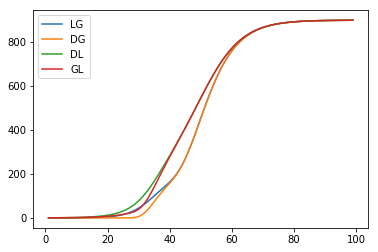

In [38]:
x = np.arange(1, 100)
y1 = logistic_gompertz_function(x, 200, 35, .25, 900, 50, .15, 0)
y2 = double_gompertz_function(x, 200, 35, .25, 900, 50, .15, 0)
y3 = double_logistic_function(x, 200, 35, .25, 900, 50, .15, 0)
y4 = gompertz_logistic_function(x, 200, 35, .25, 900, 50, .15, 0)
plt.plot(x, y1, label="LG")
plt.plot(x, y2, label="DG")
plt.plot(x, y3, label="DL")
plt.plot(x, y4, label="GL")
plt.legend(loc="best")

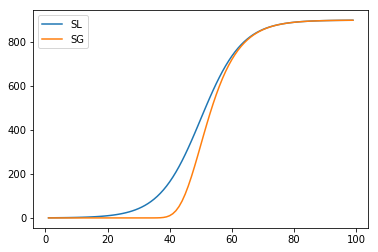

In [35]:
x = np.arange(1, 100)
y1 = simple_logistic_function(x,  900, 50, .15, 0)
y2 = simple_gompertz_function(x, 900, 50, .15, 0)
plt.plot(x, y1, label="SL")
plt.plot(x, y2, label="SG")
plt.legend(loc="best")